In [1]:
%matplotlib inline
import Trainer

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [2]:
input_size = 784
n_classes = 10
hidden_sizes = [128, 64]
batch_size=64

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.output = nn.Linear(hidden_sizes[1], n_classes)
    
    def forward(self, input):
        input = input.view(input.shape[0], -1)
        
        input = F.relu(self.fc1(input))
        input = F.relu(self.fc2(input))
        input = F.log_softmax(self.output(input), dim=1)
        
        return input

model = Network()

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

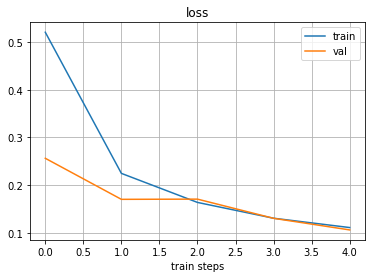

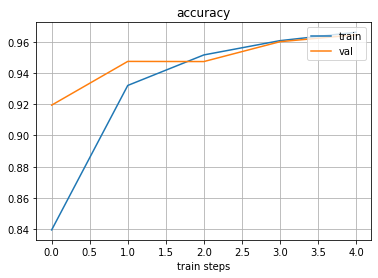

Epoch 5 validation error = 3.53%


In [3]:
Trainer.train(trainloader, testloader, model, criterion, optimizer)

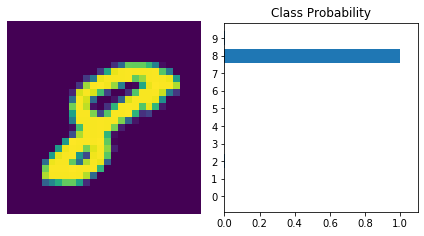

In [24]:
from Trainer import view_classify

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logprobs = model(img)

probs = torch.exp(logprobs)
view_classify(img.view(1, 28, 28), probs)